## Inferenzstatistik - Der lineare Korrelationskoeffizienten
----------------------------------------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pylab
from random import sample
from scipy.stats import t
from scipy import stats
import scipy.stats
import statsmodels.api as smi


%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Um zu prüfen, ob zwei Variablen linear korreliert sind, d. h. ob eine lineare Beziehung zwischen den beiden Variablen besteht, können wir den so genannten **$t$-Korrelationstest** anwenden. Der **lineare Korrelationskoeffizient der Grundgesamtheit**, $\rho$, misst die lineare Korrelation zweier Variablen auf die gleiche Weise wie der **lineare Korrelationskoeffizient der Stichprobe**, $r$, die lineare Korrelation zweier Variablen einer Stichprobe von Paaren misst. Sowohl $\rho$ als auch $r$ beschreiben die Stärke der linearen Beziehung zwischen zwei Variablen; $r$ ist jedoch eine Schätzung von $\rho$ der aus Stichprobendaten gewonnen wird.

Der lineare Korrelationskoeffizient von zwei Variablen liegt zwischen $-1$ und $1$. Bei $\rho=0$ sind die Variablen linear unkorreliert, es besteht also keine lineare Beziehung zwischen den Variablen. Bei $\rho \ne 0$ sind die Variablen linear korreliert. Wenn $\rho \gt 0$, sind die Variablen positiv linear korreliert, und wenn $\rho \lt 0$ sind die Variablen negativ linear korreliert.

Eine häufig verwendete Statistik zur Berechnung der linearen Beziehung zwischen quantitativen Variablen ist der <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson-Produkt-Moment-Korrelationskoeffizient</a>. Er ist gegeben durch

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}\text{,}$$

wobei $s_{xy}$ die Kovarianz von $x$ und $y$ ist und $s_x$ und $s_y$ die Standardabweichungen von $x$ bzw. $y$ sind.

Da der lineare Korrelationskoeffizient der Stichprobe, $r$ eine Schätzung des linearen Korrelationskoeffizienten der Grundgesamtheit, $\rho$, ist, können wir $r$ für einen Hypothesentest für $\rho$ verwenden. Die Teststatistik für einen Korrelationstest hat eine $t$-Verteilung mit $n-2$ Freiheitsgraden und kann wie folgt geschrieben werden

$$t= \frac{r}{\sqrt{\frac{1-r^2}{n-2}}}\text{.}$$

### Der t-Test für die Korrelation: Ein Beispiel

Um den $t$-Test für die Korrelation zu üben, laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [3]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.*

Um den $t$-Test für die Korrelation zu veranschaulichen, untersuchen wir die Beziehung zwischen den Variablen `score1` und `score2`, die das Ergebnis von zwei obligatorischen statistischen Prüfungen darstellen. **Die Frage ist, ob es eine lineare Beziehung zwischen den Noten von zwei aufeinanderfolgenden statistischen Prüfungen gibt?**

### Vorbereitung der Daten

Wir beginnen mit der Datenvorbereitung.

- Wir unterteilen den Datensatz anhand der Variablen `score1` und `score2`. Durch Anwendung der Funktion `dropna()` lassen wir alle `nan`-Werte im Datensatz aus.
- Dann ziehen wir aus jeder Teilmenge 50 Studierende und extrahieren die Variablen von Interesse.

In [4]:
n = 50
sample_idx = students.dropna()
sample_idx = sample_idx.sample(n,random_state = 1) 

score1 = sample_idx['score1'] 
score2 = sample_idx['score2'] 

Zum Zweck der visuellen Kontrolle stellen wir die Stichprobe in Form eines Streudiagramms dar.

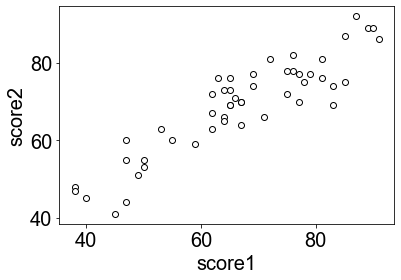

In [5]:
plt.xlabel('score1')
plt.ylabel('score2')
plt.scatter(score1, score2,edgecolor = 'k', color = 'white')

Die visuelle Inspektion zeigt, dass eine positive lineare Beziehung zwischen den Variablen `score1` und `score2` besteht.

### Überprüfung der Hypothesen

Zur Durchführung des $t$-Tests für die Korrelation folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests. Der $t$-Test für die Korrelation folgt demselben schrittweisen Verfahren wie in den vorangegangenen Abschnitten beschrieben. 

\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass es keinen linearen Zusammenhang zwischen den Noten von zwei aufeinanderfolgenden Statistikprüfungen gibt.

$$H_0: r  = 0$$

Erinnern Sie sich daran, dass die Formulierung der Alternativhypothese vorgibt, ob wir einen zweiseitigen, einen links- oder einen rechtsseitigen Hypothesentest durchführen.

**Alternative Hypothese**

$$H_A: r \ne 0$$

Diese Formulierung führt zu einem zweiseitigen Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0.01$$

In [6]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die obige Gleichungsform:

$$t= \frac{r}{\sqrt{\frac{1-r^2}{n-2}}}$$

In [7]:
n = len(score1)

# Compute the value of the test statistic
#  pearson correlation coefficient r
r = np.corrcoef(score1, score2)[0][1]

#test statistic
tw = r / np.sqrt((1-r**2)/(n-2))
tw

14.846357121994247

Der numerische Wert der Teststatistik ist $14,846357$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet:

$$df = n - 2= 48$$

In [8]:
# Compute the p-value
df = len(score1)-2

# two-sided test
p_upper = t.sf(abs(tw), df = df)
p_lower = t.cdf(-abs(tw), df = df)
p = p_upper + p_lower
p

1.4401962006630608e-19

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [11]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=1,4401962 \cdot 10^{-19}$. Bei einem Signifikanzniveau von $1 \%$ lassen die Daten den Schluss zu, dass die Prüfungsnoten der Studenten linear korreliert sind.

### Hypothesentests in Python

Wir haben soeben einen $t$-Test für die Korrelation in Python manuell durchgeführt. Wir können dasselbe in Python mit nur einer Zeile Code tun!

Dazu wenden wir die Funktion `pearsonr()` an. Für die Funktion verwenden wir die zwei Vektoren, `score1` und `score2`, als Dateneingabe.

In [12]:
r, p_value = stats.pearsonr(score1,score2)
print('Korrelationskoeffizient : ',r)
print('p - Wert : ',p_value)

Korrelationskoeffizient :  0.9061854032279849
p - Wert :  1.4401962006631032e-19


Perfekt! Vergleichen Sie die Ausgabe der Funktion `pearsonr()` mit unserem Ergebnis von oben. Darüber hinaus gibt die Funktion den Pearson-Korrelationskoeffizienten für die Beispieldaten aus. Aus der Ausgabe der Funktion `pearsonr()` können wir schließen, dass die Daten bei einem Signifikanzniveau von $1 \%$ sehr starke Hinweise darauf liefern, dass die Prüfungsnoten der Studenten linear korreliert sind.